# Présentation

Dans cette partie, nous allons proceder à une analyse exploratoire _(Exploratory Data Analysis (EDA))_ avec une partie visuatlisation. 

Le present notebook requiert l'exécution du notebook *text_Normalisation* qui entre outres exporte les résultats des opérations de prétraitement sur un fichier baptisé (encoded_reviews.csv).

### $Initialisation$

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

### $Extraction$ $des$ $données$ $et$ $apperçu$

In [28]:
df = pd.read_csv('encoded_reviews.csv')
print('Dataset Shape :', df.shape)
print('Dataset overview :')
display (df.head())

Dataset Shape : (13630, 5)
Dataset overview :


,Rating,Year_Month,Reviewer_Location,sentiment,text
0,5,2019-3,United Arab Emirates,1,hongkong tokyo far best look forward biggest o...
1,4,2018-6,United Kingdom,1,go april easter weekend say june choose date l...
2,5,2019-4,United Kingdom,1,fantastic queue decent best apparently manage ...
3,4,2019-4,Australia,1,realise school holiday go consequently extreme...
4,5,missing,France,1,make warm fuzzy actual big make fun fill happy...


### $Analyse$ $exploratoire$ $des$ $données$

Tout d'abord, nous allons effectué une analyse exploratoire ou **Exploratory Data Analysis** **(EDA)** des visiteurs, leurs évaluations moyennes, distribution géographiques (provenance des visiteurs) et l'évolution des évaluations dans le temps.

Average Rating ==> 3.96008804108584


<AxesSubplot:>

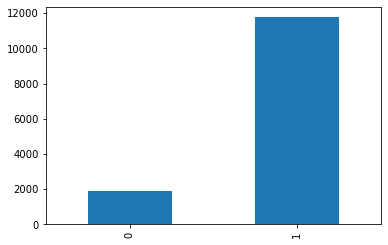

In [14]:
# Average Rating
print ('Average Rating ==>', np.mean(df['Rating']))
df['sentiment'].value_counts().plot.bar()

Le moyenne générales des notes est de presque 4/5, ce qui est plutôt une feedback positif. Le diagramme qui le suit confirme la prédominance des avis positif. 

#### $Provenance$ $des$ $visiteurs$

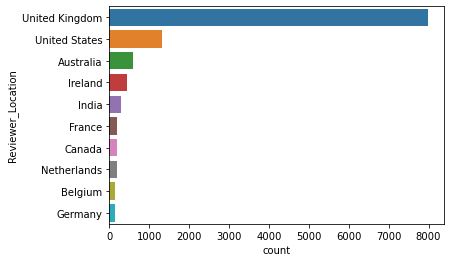

In [15]:
import seaborn as sns
#print(df['Reviewer_Location'].value_counts())

from pylab import savefig

graph = sns.countplot(y="Reviewer_Location", data=df,
              order=df.Reviewer_Location.value_counts().iloc[:10].index)
figure = graph.get_figure() 
#figure.savefig('output/ca_visitors.jpg', dpi=300, bbox_inches='tight')

On remarque une casi-totalité des review originaires de la royaume unie (UK) suivi par les états unis (USA)

#### $Evolution$ $des$ $Rating$ $par$ $ans$

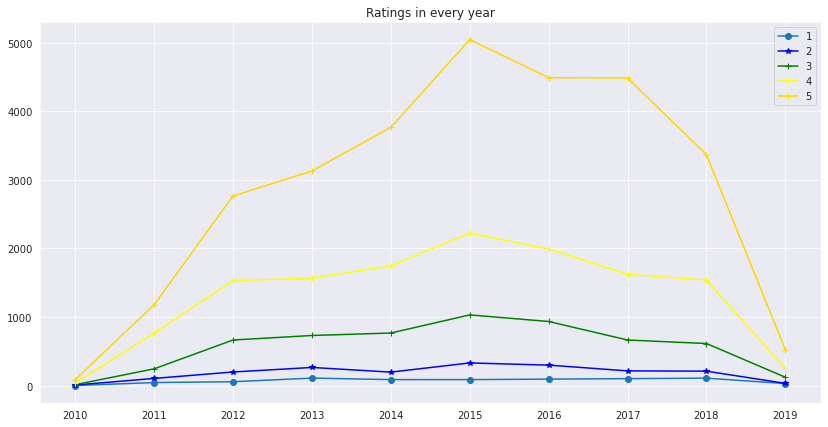

In [16]:
#df.Year_Month.str.split("-", n = 1, expand = True)[0]
#(df.Year_Month == 'missing').value_counts(normalize=True)
# just to deal with SettingWithCopyWarning in Pandas. More details on :
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
# df1 = df[df.x>2].copy(deep=False)
df_nomiss = df[df.Year_Month != 'missing'].copy(deep=False)
df_nomiss['year'] = df_nomiss.Year_Month.str.split("-", n = 1, expand = True)[0]
df_nomiss['month'] = df_nomiss.Year_Month.str.split("-", n = 1, expand = True)[1]

# Ratings in every year
one = df_nomiss.loc[df_nomiss['Rating']==1]
one=one.groupby('year',as_index=False).agg({'Rating':'sum'})
#== 
two = df_nomiss.loc[df_nomiss['Rating']==2]
two=two.groupby('year',as_index=False).agg({'Rating':'sum'})

#== 
three = df_nomiss.loc[df_nomiss['Rating']==3]
three=three.groupby('year',as_index=False).agg({'Rating':'sum'})
#=== 
four = df_nomiss.loc[df_nomiss['Rating']==4]
four=four.groupby('year',as_index=False).agg({'Rating':'sum'})
#===
fifth = df_nomiss.loc[df_nomiss['Rating']==5]
fifth=fifth.groupby('year',as_index=False).agg({'Rating':'sum'})
#============== 
sns.set_style("darkgrid")
plt.figure(figsize=(14,7))
plt.title('Ratings in every year')
plt.plot(one['year'] ,one['Rating'],marker='o',label='1') 
plt.plot(two['year'] , two['Rating'],color='blue',marker='*',label='2')  
plt.plot(three['year'] ,three['Rating'],color='green',marker='+',label='3') 
plt.plot(four['year'] ,four['Rating'],color='yellow',marker='+',label='4') 
plt.plot(fifth['year'] ,fifth['Rating'],color='gold',marker='+',label='5') 
plt.legend();
plt.savefig("rating_year.jpg", bbox_inches='tight', dpi = 300)


### $Création$ $des$ $nuages$ $de$ $mots$

##### $Rappel$ $sur$ $le$ $filtrage$ $stopword$ $et$ $la$ $tokenisation$

In [29]:
from nltk.corpus import stopwords

# Initialiser la variable des mots vides
stop_words = set(stopwords.words('english'))

# Ajouter plus de mots pour ne garder que des mots significatives dans notre context
extention = {'pass', 'also', 'see', 'take', 'get', 'paris', 'park', 'find', 'still', 'even', 'staff', \
             'u', 'year', 'although', 'experience', 'use', 'really', 'place', 'hotel', 'visit', 'etc', 'thing', \
             'would', 'could', 'though', 'disneyland', 'make', 'however', 'people', 'around', 'us', 'look',
             'know', 'line', 'think', 'theme', 'things', 'character', 'say', 'disney', 'ticket', 'many', 'lot', \
             'one', 'euro', 'restaurant', 'everything', 'always', 'hour', 'first', 'studio', 'tell', 'time',\
             'another', 'back', 'give', 'adult', 'children', 'daughter', 'work', 'two', 'go', 'open', 'village',\
             'come', 'mean', 'meet', 'try', 'especially', 'food', 'rid', 'kid', 'rid', 'way', 'start', 'spend', \
             'book', 'seem', 'plan', 'hours', 'studios', 'day', 'manage', 'minute', 'family', 'trip', 'return',\
             'whole', 'arrive', 'florida', 'different', 'area', 'restaurants', 'last', 'child',\
             'attraction', 'queue', 'days', 'eat', 'world'}

extended_sw = stop_words.copy()
extended_sw.update(extention)

from nltk.tokenize import RegexpTokenizer
def regex_tokenize(txt):
    tokenizer = RegexpTokenizer(r'\w+')
    mots = tokenizer.tokenize(txt)    
    return mots

df.text = list(map(regex_tokenize, df.text))
#df.text[0]

##### $WordCloud$ $pour$ $tout$ $le$ $dataset$

In [34]:
# Convertir les listes en simple text (Reduce)
from functools import reduce
start = time.time()
mega_list = reduce(lambda l1, l2: l1+l2, df.text)
end = time.time()
print('Calculation done in :', round(end - start, 2), 's') # ==> 29s 143s
# ==> 164s 148s 160s 164.34s 175.09s 147.43s
len(mega_list) # => 843423

# A short example to check how the sum of lists is done
#l11 = [1,2,3]
#l22 = [4,5,6, 1,2,3]
#l11+l22

text = ""
for word in mega_list : 
    text += word+ ' '
#len (pos_text)

Calculation done in : 143.22 s


843423

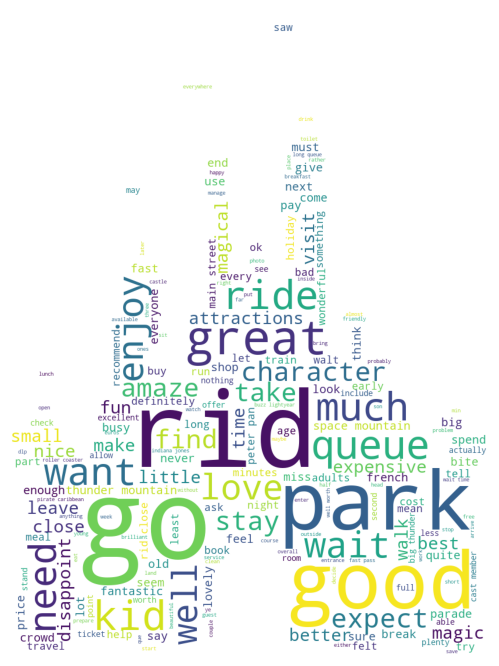

In [42]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

from PIL import Image
mask = np.array(Image.open("castle.jpg"))
wordcloud = WordCloud(background_color="white", mask = mask).generate(text)
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud)
plt.axis("off")
#plt.savefig("disneyca"+".jpg", bbox_inches='tight', dpi = 300)
plt.show()

##### $WordCloud$ $pour$ $l'ensemble$ $des$ $reviews$ $positifs$

In [47]:
# 1/ WordCloud for positif 
from functools import reduce

# Définir la variable text
# Séparer df en données positives et négatives
df_pos = df[df.sentiment == 1]
start = time.time()
pos_mega_list = reduce(lambda l1, l2: l1+l2, df_pos.text)
end = time.time()
print('Calculation done in :', round(end - start, 2), 's')  # ==> 109s 62s 64.17s 100.21s


pos_text = ""
for word in pos_mega_list : 
    pos_text += word+ ' '
#len (pos_text)

Calculation done in : 106.5 s


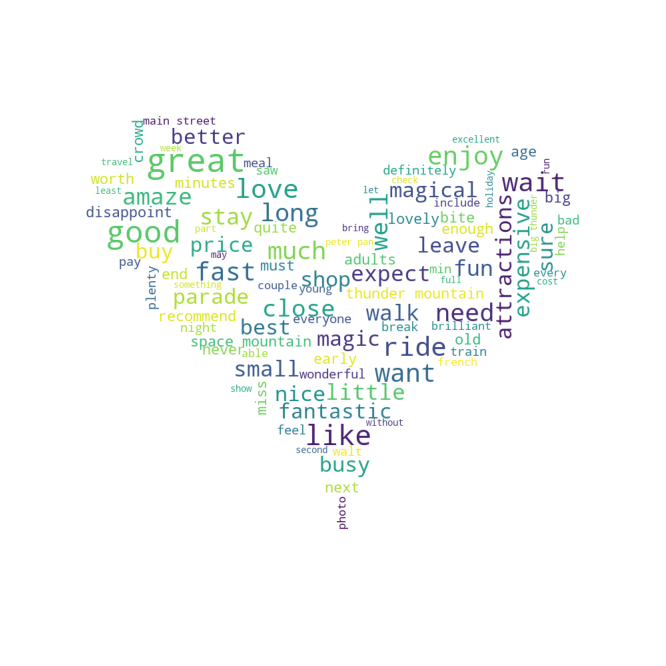

In [53]:
# Définir le calque du nuage des mots
from PIL import Image
mask_coloring = np.array(Image.open(str('love.jpg')))
wc = WordCloud(background_color="white", max_words=100, stopwords=c, max_font_size=50, \
                mask = mask_coloring, random_state=42)

import matplotlib.pyplot as plt 
# Générer et afficher le nuage de mots
plt.figure(figsize= (20,12)) # Initialisation d'une figure
wc.generate(pos_text) 
plt.axis("off")# "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

##### $WordCloud$ $pour$ $l'ensemble$ $des$ $reviews$ $négatifs$

In [50]:
# 2/ WordCloud for Neg 
# Définir la variable text
# Séparer df en données positives et négatives
df_neg = df[df.sentiment == 0]

start = time.time()
neg_mega_list = reduce(lambda l1, l2: l1+l2, df_neg.text)
end = time.time()
print('Calculation done in ', round(end-start, 2), 's')# ==> 4.14s 13.92s

neg_text = ''
for word in neg_mega_list : 
    neg_text += word+ ' '
#len (neg_text)

Calculation done in  3.06 s


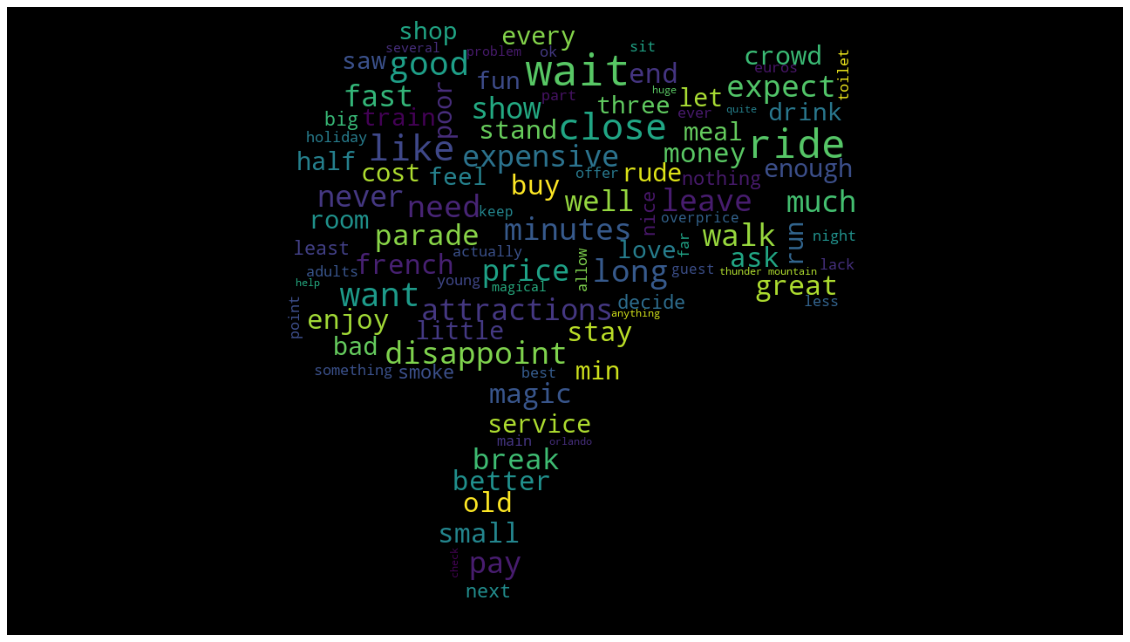

In [54]:
# Définir le calque du nuage des mots
from PIL import Image
mask_coloring = np.array(Image.open(str('dislike.jpg')))
wc = WordCloud(background_color="black", max_words=100, stopwords=c, max_font_size=50, \
                mask = mask_coloring, random_state=42)

# Générer et afficher le nuage de mots
plt.figure(figsize= (20,12)) # Initialisation d'une figure
wc.generate(neg_text)  
plt.axis("off")# "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()